# :oncoming_automobile: Car Price Analytics
## 07 Hypothesis Ttesting no.5 & Model Building

|Field|Description|
|-----|-----------|
|**Author:** |Cosmin Manolescu|
|**Course:** |Code Institute – Data Analytics with AI Bootcamp|
|**Project Type:** |Hakathon 1|
|**Team Name:** | tbc |
|**Date:** | November 2025| 

---
### Objectives
This notebook aims to deliver 2 objectives:
1. Address the hypothesis, *Ha* "There is at least 1 feature with a statistically significant correlation to Price"
    - *H0*: "No feature presents with a statistically significant correlation to Price"
    - Firstly, Price and other continuous features will have their distribution and outliers assessed and eliminated.
    - Secondly, various statistical tests will be used to determine the correlation between predictors and target
    - Thirdly, a correlation analysis between the predictors will be performed and redundant features eliminated
2. Build a ML model, specifically, a multiple regression.
    - Features will be normalised (if needed) and standardised
    - Data will be split into train and test
    - Categorical feature encoding
    - Model will be trained
    - Model will be assessed

### Inputs
- data/final/car_price.csv

### Outputs
- selection of promising predictors
- multiple regression model

### Additional Comments


In [141]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu, kruskal
import math


## Obj 1 - Hypothesis testing

In [42]:
# load and inspect the data
df = pd.read_csv(Path.cwd().parent / 'data/final/car_prices.csv')
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,manufacturer,model,compressionratio_bin,price_per_hp,power_to_weight_ratio,engine_efficiency,avg_mpg,price_per_mpg
0,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,13495.0,alfa-romero,giulia,Low,121.576577,0.043564,0.853846,24.0,562.291667
1,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,16500.0,alfa-romero,stelvio,Low,148.648649,0.043564,0.853846,24.0,687.500000
2,1,petrol,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,26,16500.0,alfa-romero,Quadrifoglio,Low,107.142857,0.054552,1.013158,22.5,733.333333
3,2,petrol,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,30,13950.0,audi,100 ls,Standard,136.764706,0.043646,0.935780,27.0,516.666667
4,2,petrol,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,22,17450.0,audi,100ls,Low,151.739130,0.040722,0.845588,20.0,872.500000


In [150]:
# declare the categorical and continuous variables
cats = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 
        'cylindernumber', 'fuelsystem', 'manufacturer', 'compressionratio_bin']
conts = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize','boreratio', 
        'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price_per_hp', 
        'power_to_weight_ratio','engine_efficiency', 'avg_mpg', 'price_per_mpg']
target = 'price'

In [44]:
# convert to corect dtypes
for col in cats:
    df[col] = df[col].astype('category')

In [45]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_per_hp,power_to_weight_ratio,engine_efficiency,avg_mpg,price_per_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,123.214711,0.040063,0.822331,27.985366,558.972624
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,38.972018,0.009570,0.182925,6.666038,492.203246
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,72.836207,0.019936,0.509091,15.000000,103.020000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,96.579545,0.034188,0.711340,22.500000,240.379747
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,110.636364,0.037801,0.779817,27.000000,369.423729
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,139.659091,0.044489,0.883978,32.000000,693.181818
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,256.910569,0.085561,1.687500,51.500000,3026.666667


### Outlier check

Outliers and distributions will be checked for all features but a detail analysis and potential trimming will only be performed to 'Price'. The other features will be trimmed only if, visually, there are very obvious outliers.

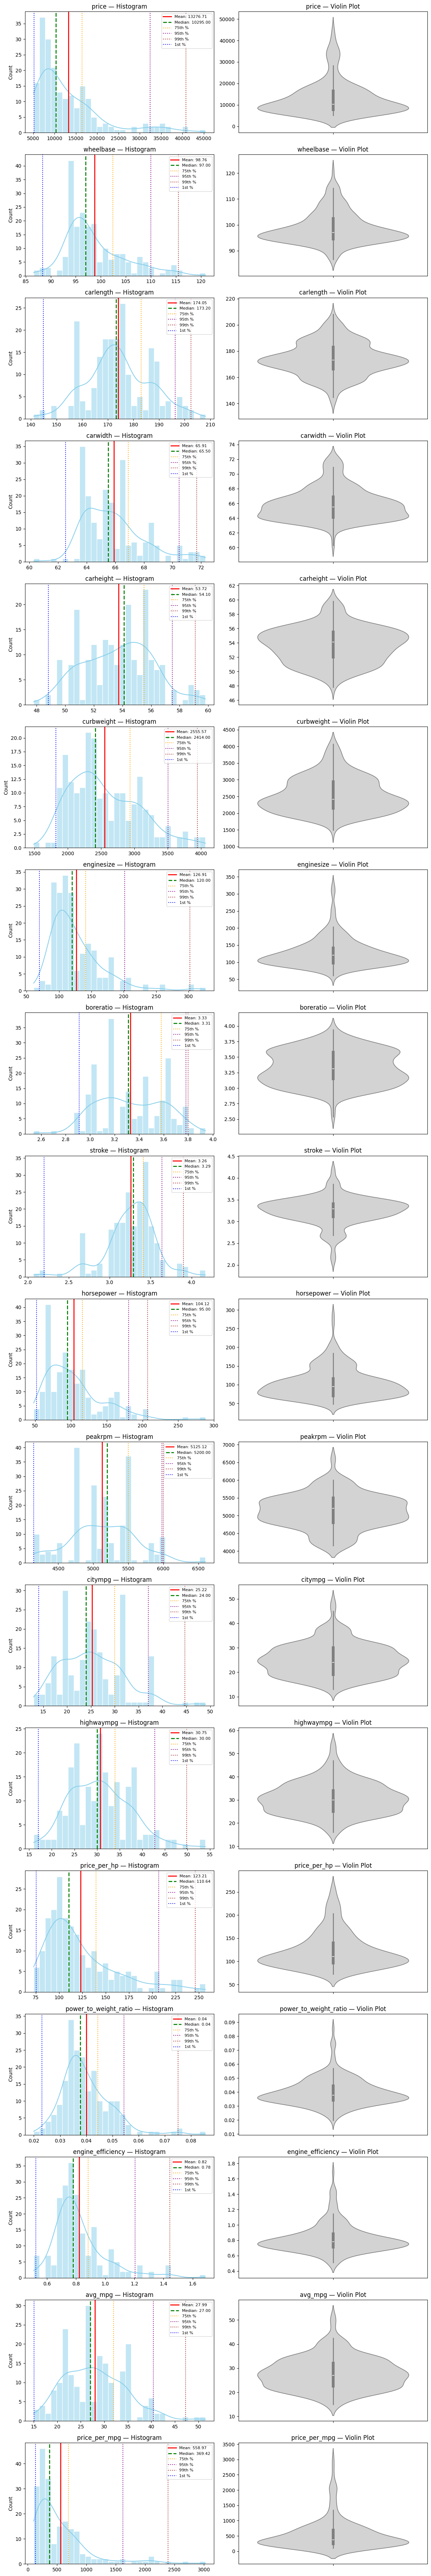

In [46]:
# create figures to explore distributions and outliers

# basic figure setup
n_features = len([target] + conts)
fig, axes = plt.subplots(n_features, 2, figsize=(12, 4 * n_features))
plt.subplots_adjust(hspace=0.4)

for i, feature in enumerate([target] + conts):
    ax_hist = axes[i, 0]
    ax_violin = axes[i, 1]

    # column A: Histogram with KDE and key stats
    sns.histplot(df[feature], bins=30, kde=True, ax=ax_hist, color='skyblue', edgecolor='white')

    # calculate key stats
    mean = df[feature].mean()
    median = df[feature].median()
    q1, q75, q95, q99 = np.percentile(df[feature], [1, 75, 95, 99])

    # add vertical lines
    ax_hist.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean:.2f}')
    ax_hist.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    ax_hist.axvline(q75, color='orange', linestyle=':', linewidth=1.5, label='75th %')
    ax_hist.axvline(q95, color='purple', linestyle=':', linewidth=1.5, label='95th %')
    ax_hist.axvline(q99, color='brown', linestyle=':', linewidth=1.5, label='99th %')
    ax_hist.axvline(q1, color='blue', linestyle=':', linewidth=1.5, label='1st %')

    ax_hist.set_title(f'{feature} — Histogram')
    ax_hist.legend(loc='upper right', fontsize=8)
    ax_hist.set_xlabel('')
    ax_hist.set_ylabel('Count')

    # column B: Violin plot
    sns.violinplot(y=df[feature], ax=ax_violin, color='lightgray')
    ax_violin.set_title(f'{feature} — Violin Plot')
    ax_violin.set_xlabel('')
    ax_violin.set_ylabel('')

plt.tight_layout()
plt.show()

<ins>**Conclusions**</ins>
1. 'Price' has a typical exponential distribution, with several values past the 99th percentile.
2. Most of the predictors have a very similar amount of values above the 99th percentile, which, most likely, are linked to the same cars presenting with the outlier prices.
3. There are also several features with notable amounts of values below the 1st percentile: those related to car dimensions (i.e. lenght, width, weight), and boreratio and stroke.

<ins>**Action**</ins>

Outliers above the 99th of 'Price' will be dropped, which most likely will remove the upper outliers of the predictors features. The lower outliers will be left as they are, since a. less than half the predictors have such outliers; and b. the dataset is too small allow for that many dropped rows

In [49]:
# given the exponential dist. of 'Price', an upper quantile cap will be applied

lower, upper = df['price'].quantile([0.0, 0.99])
df = df.query('price <= @upper')
df.reset_index(inplace = True, drop = True)

### Statistical analysis

<ins>**Continuous features**</ins>

Since 'Price' and most of the continuous predictors do not have a normal distribution, <ins>*non-parametric*</ins> tests will be used.

<ins>*Spearman rank correlation*</ins> will be used to check the relationship between 'Price' and continuous predictors. This test is used because: a. it is a non-parametric; and b. investigatis monotonic, but not necessarily linear, relationships.

In [93]:
# function to compute Spearman correlation
def spearman_feature_test(df, predictors, target):
    """
    Computes Spearman rank correlation between each predictor and target.

    Parameters:
        df : pd.DataFrame
            Input dataframe containing predictors and target.
        predictors : list
            List of predictor variable names (continuous or ordinal).
        target : str
            Target variable name (continuous).

    Returns:
        pd.DataFrame
            DataFrame with columns: ['feature', 'spearman_corr', 'p_value']
    """
    results = []

    for feature in predictors:
        # Drop NA pairs to avoid alignment issues
        valid = df[[feature, target]].dropna()

        # Compute Spearman correlation
        corr, pval = spearmanr(valid[feature], valid[target])

        results.append({
            'feature': feature,
            'spearman_corr': round(corr, 3),
            'p_value': round(pval, 3)
        })

    results_df = pd.DataFrame(results).sort_values(by='spearman_corr', ascending=False).reset_index(drop=True)
    return results_df

In [94]:
spearman_results = spearman_feature_test(df, conts, target)
spearman_results.head(30)

,feature,spearman_corr,p_value
0,price_per_mpg,0.978,0.000
1,curbweight,0.905,0.000
2,horsepower,0.848,0.000
3,enginesize,0.818,0.000
4,carwidth,0.804,0.000
5,carlength,0.796,0.000
6,price_per_hp,0.677,0.000
7,wheelbase,0.670,0.000
8,boreratio,0.630,0.000
9,power_to_weight_ratio,0.489,0.000


<ins>**Conclusions**</ins>
1. Features with an insignificant correlation (p < 0.05): 'stroke', 'peakrpm'
2. <ins>WEAK (< 0.3)</ins> corr.: 'carheight'
3. <ins>MODERATE (< 0.5)</ins> corr.: 'engine_efficiency', 'power_to_weight_ratio'
4. <ins>STRONG (< 0.7)</ins> corr.: 'boreratio', 'wheelbase', 'price_per_hp'
5. <ins>VERY STRONG (< 0.9)</ins> corr.:
    - Positive: 'carlenght', 'carwidth', 'enginesize', 'horsepower', 'curbweight'
    - Negative: 'highwaympg', 'citympg', 'avg_mpg'
6. <ins>EXTREMELY STRONG (< 0.9)</ins> corr.: 'price_per_mpg'

<ins>**Note on Extremely Strong correlations**</ins>

Features correlated above 90% with the target can act as almost proxies to them. For model training, such predictors can lead to **data leakage**, i.e. the model learns almost the same info from this predictors as it does from the target variable. Given that 'price_per_mpg' = 'price'/'avg_mpg', this is most likely a case of data leakage.

<ins>**Actions**</ins>
1. Will use all features with at least a MODERATE correlation.
2. Will drop features with an insignificant correlation or with an Extremely Strong correlation

In [95]:
conts_after_corr = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 
        'citympg', 'highwaympg', 'price_per_hp', 'power_to_weight_ratio','engine_efficiency', 'avg_mpg']

<ins>**Categorical features**</ins>

Since 'Price' does not have a normal distribution, <ins>*non-parametric*</ins> tests will be used.

<ins>*Mann-Whitney U*</ins> will be used for categorical features with only 2 levels.

<ins>*Kruskal-Wallis*</ins> will be used for categorical features with multiple levels.

In [156]:
# separate cats into binary and multi-category
cats_binary = [cat for cat in cats if df[cat].nunique() == 2]
cats_multi = [cat for cat in cats if df[cat].nunique() > 2]

# drop manufacurturer due to high cardinality
cats_multi.remove('manufacturer')

In [152]:
# function to perform non-parametric tests for categorical features
def categorical_feature_tests(df, binary_features, multi_features, target):
    """
    Performs non-parametric tests (Mann-Whitney U and Kruskal-Wallis)
    between categorical predictors and a continuous target variable.

    Parameters
        df : pd.DataFrame
            Input dataframe containing all variables.
        binary_features : list
            List of binary categorical feature names (must have exactly 2 unique values).
        multi_features : list
            List of multi-level categorical feature names (3 or more unique values).
        target : str
            Name of the continuous target variable.

    Returns
        pd.DataFrame
            DataFrame with columns: ['feature', 'test', 'statistic', 'p_value', 'n_levels']
    """
    results = []

    # for binary features (Mann-Whitney U test)
    for feature in binary_features:
        valid = df[[feature, target]]
        groups = valid.groupby(feature)[target].apply(list)

        stat, p = mannwhitneyu(groups.iloc[0], groups.iloc[1], alternative='two-sided')
        results.append({
            'feature': feature,
            'test': 'Mann-Whitney U',
            'statistic': round(stat, 3),
            'p_value': round(p, 3)
        })


    # for multi-level features (Kruskal-Wallis H test) 
    for feature in multi_features:
        valid = df[[feature, target]]
        groups = valid.groupby(feature)[target].apply(list)

        stat, p = kruskal(*groups)
        results.append({
            'feature': feature,
            'test': 'Kruskal-Wallis H',
            'statistic':round(stat, 3),
            'p_value': round(p, 3)
        })

    results_df = pd.DataFrame(results)
    return results_df

In [157]:
cat_results_df = categorical_feature_tests(df, cats_binary, cats_multi, target);
cat_results_df.head(30)

/var/folders/6d/4qqmbbk90jg_rr8cp3n70klw0000gn/T/ipykernel_5468/3644785001.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = valid.groupby(feature)[target].apply(list)
/var/folders/6d/4qqmbbk90jg_rr8cp3n70klw0000gn/T/ipykernel_5468/3644785001.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = valid.groupby(feature)[target].apply(list)
/var/folders/6d/4qqmbbk90jg_rr8cp3n70klw0000gn/T/ipykernel_5468/3644785001.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observ

,feature,test,statistic,p_value
0,fueltype,Mann-Whitney U,2353.000,0.032
1,aspiration,Mann-Whitney U,1555.500,0.000
2,doornumber,Mann-Whitney U,5800.000,0.057
3,symboling,Kruskal-Wallis H,58.519,0.000
4,carbody,Kruskal-Wallis H,19.314,0.000
5,drivewheel,Kruskal-Wallis H,90.956,0.000
6,enginetype,Kruskal-Wallis H,36.693,0.000
7,cylindernumber,Kruskal-Wallis H,78.508,0.000
8,fuelsystem,Kruskal-Wallis H,122.909,0.000
9,compressionratio_bin,Kruskal-Wallis H,10.688,0.005


In [ ]:
# now check the value counts for each categorical feature
for cat in cats_binary + cats_multi:
    print(df[cat].value_counts())

fueltype
petrol    182
diesel     20
Name: count, dtype: int64
aspiration
std      165
turbo     37
Name: count, dtype: int64
doornumber
four    114
two      88
Name: count, dtype: int64
symboling
 0    65
 1    53
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
carbody
sedan          94
hatchback      70
wagon          25
convertible    13
Name: count, dtype: int64
drivewheel
fwd    120
rwd     73
4wd      9
Name: count, dtype: int64
enginetype
ohc      147
ohcf      15
dohc      12
l         12
ohcv      11
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        23
five       11
two         4
eight       3
three       1
twelve      1
Name: count, dtype: int64
fuelsystem
mpfi    91
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64
compressionratio_bin
Low         111
Standard     71
High         20
Name: count, dtype: int64


<ins>**Conclusions**</ins>
1. Only 'doornumber' has an insignificant relationship with 'Price'
2. Several features with very imbalanced groups: 'fuelsystem', 'cylindernumber', 'enginetype', 'fueltype', 'aspiration'
3. as an ordinal feature, 'symboling' can be re categorised to improve balance

<ins>**Actions**</ins>
1. Drop 'doornumber', 'fuelsystem', 'cylindernumber', 'enginetype', 'fueltype', 'aspiration'
2. Re categorise 'symboling' to balance categories

In [ ]:
# drop features with insignificant correlation orimbalanced groups
cats = [cat for cat in cats if cat not in ['manufacturer','doornumber', 'fuelsystem', 'cylindernumber', 'enginetype', 'fueltype', 'aspiration']]
# recategorise 'symboling' to improve balance
df['symboling_binned']= df['symboling'].cat.remove_categories([3]).replace({-2: 'Low', -1: 'Low', 0: 'Medium', 1: 'High', 2: 'Very High', 3: 'Very High'})
cats.append('symboling_binned')
cats.remove('symboling')


/var/folders/6d/4qqmbbk90jg_rr8cp3n70klw0000gn/T/ipykernel_5468/4110483399.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['symboling_binned']= df['symboling'].cat.remove_categories([3]).replace({-2: 'Low', -1: 'Low', 0: 'Medium', 1: 'High', 2: 'Very High', 3: 'Very High'})


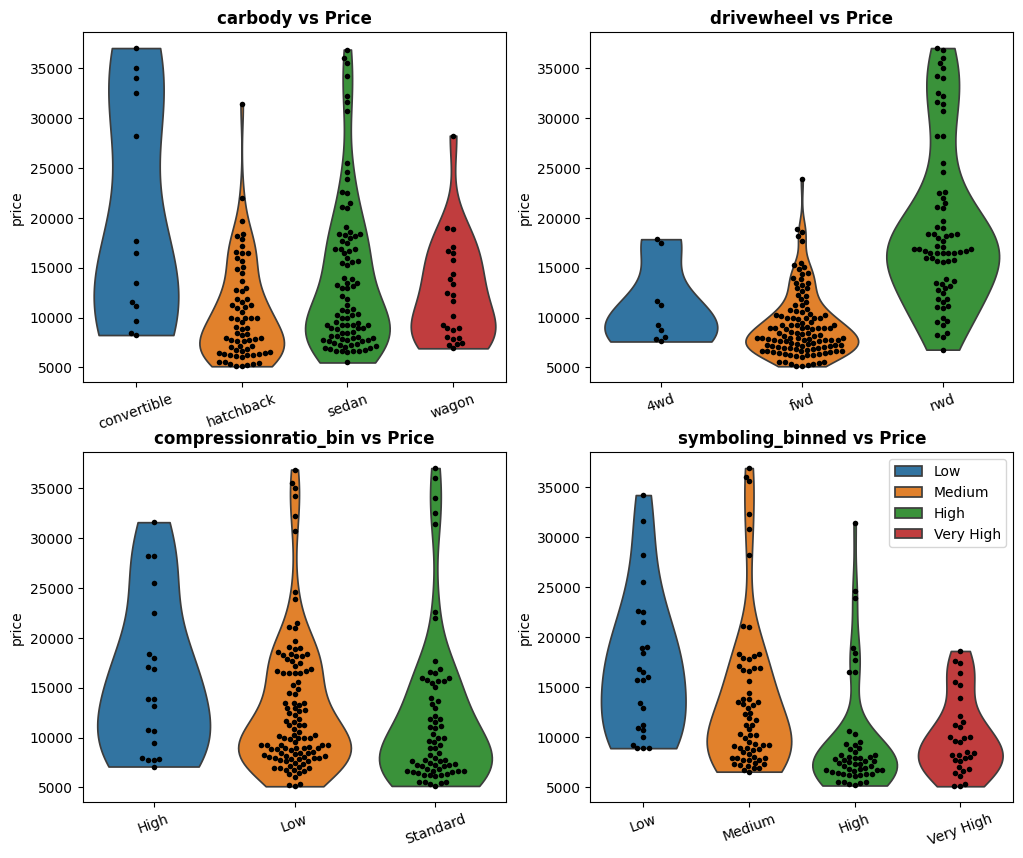

In [180]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(cats):
        ax = axes[i]
        # Violin plot
        sns.violinplot(
            data=df, x=feature, y='price',
            ax=ax, hue = feature, inner=None, cut=0
        )
        # Swarm plot
        sns.swarmplot(
            data=df, x=feature, y='price',
            ax=ax, color='black', size=4
        )

        ax.set_title(f'{feature} vs Price', fontsize=12, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('price')
        ax.tick_params(axis='x', rotation=20)

<ins>**Final Selection of Categorical Features**</ins>
1. carbody
2. drivewheel
3. compressionratio_bin
4. symboling_binned

### Intra-predictor correlation

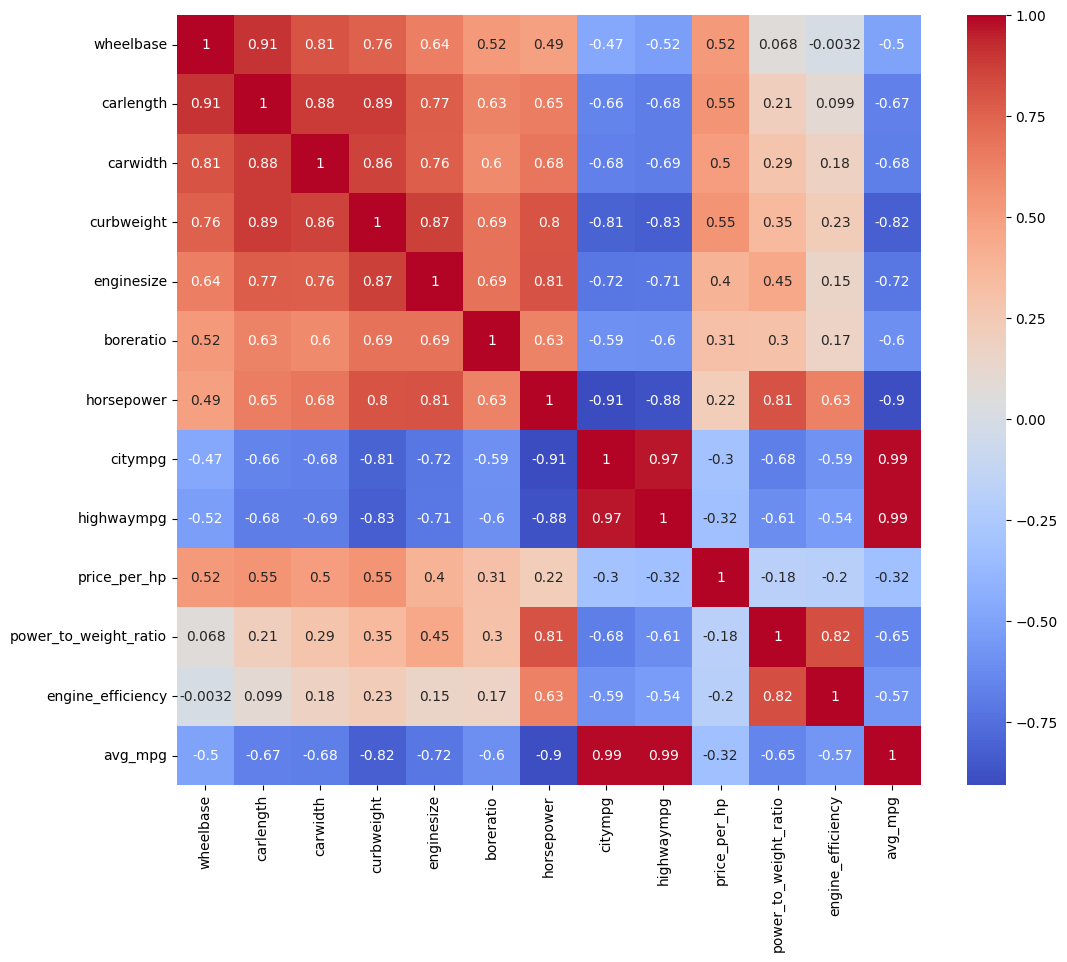

In [117]:
# create correlation matrix
corr = df[conts_after_corr].corr(method = 'spearman')

fig = plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [108]:
for col in corr.columns:
    print(f"For column: {col}")
    high_corrs = corr.index[(corr[col].abs() >= 0.85)  & (corr.index != col)].tolist()
    if high_corrs:
        print(f"HIGH: {high_corrs}")
    print(30*'-')


For column: wheelbase
HIGH: ['carlength']
------------------------------
For column: carlength
HIGH: ['wheelbase', 'carwidth', 'curbweight']
------------------------------
For column: carwidth
HIGH: ['carlength', 'curbweight']
------------------------------
For column: curbweight
HIGH: ['carlength', 'carwidth', 'enginesize']
------------------------------
For column: enginesize
HIGH: ['curbweight']
------------------------------
For column: boreratio
------------------------------
For column: horsepower
HIGH: ['citympg', 'highwaympg', 'avg_mpg']
------------------------------
For column: citympg
HIGH: ['horsepower', 'highwaympg', 'avg_mpg']
------------------------------
For column: highwaympg
HIGH: ['horsepower', 'citympg', 'avg_mpg']
------------------------------
For column: price_per_hp
------------------------------
For column: power_to_weight_ratio
------------------------------
For column: engine_efficiency
------------------------------
For column: avg_mpg
HIGH: ['horsepower', 

1. 'curbweight' vs ['carlength', 'carwidth', 'enginesize'] => keep 'curbweight'
2. 'horsepower' vs ['citympg', 'highwaympg', 'avg_mpg'] => keep 'horsepower'
------------------------------
DROP: ['carlength', 'carwidth', 'enginesize', 'citympg', 'highwaympg', 'avg_mpg']

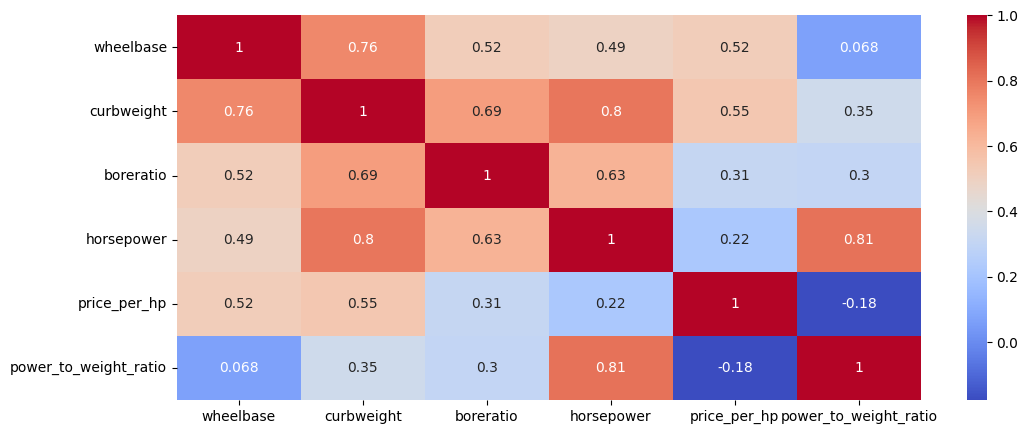

In [125]:
# create correlation matrix
corr = df[[col for col in conts_after_corr if col not in ['carlength', 'carwidth', 'enginesize', 'citympg', 'highwaympg', 'avg_mpg', 'engine_efficiency']]].corr(method = 'spearman')

fig = plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<ins>**Final Selection of Continuous Features**</ins>

In order of correlation strenght to 'Price': 'curbweight', 'horsepower', 'price_per_hp', 'wheelbase', 'boreratio','power_to_weight_ratio'

## Obj 2 - Modeling